## SUPPORT VECTOR CLASSIFIER IMPLEMENTATION

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# lets create synthetic datapoints

In [52]:
from sklearn.datasets import make_classification
x,y= make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [53]:
x

array([[-0.31824981,  1.05054063],
       [-1.31363654, -2.34154158],
       [-1.00323272,  1.15449348],
       ...,
       [-0.6042025 , -0.88873825],
       [ 0.21765906, -1.18731158],
       [-1.32056826, -1.04428559]])

<Axes: xlabel='0', ylabel='1'>

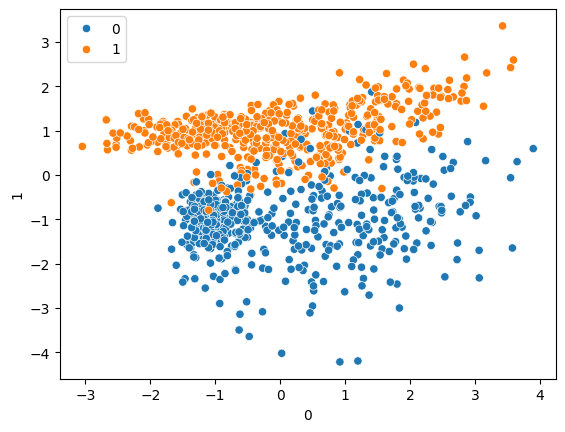

In [54]:
sns.scatterplot(x = pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue=y)

In [55]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC(kernel= 'linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [58]:
# prediction

y_pred = svc.predict(x_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       131
           1       0.96      0.97      0.96       119

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[126   5]
 [  4 115]]


In [61]:
rbf =SVC(kernel='rbf')

In [62]:
rbf.fit(x_train,y_train)

SVC()

In [63]:
y_pred1 = rbf.predict(x_test)

In [64]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       131
           1       0.95      0.97      0.96       119

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[125   6]
 [  3 116]]


Because of the rbf kernal 
internally some transformation has happend and the accuracy of the model has been improved

In [69]:
poly = SVC(kernel='poly')
poly.fit(x_train,y_train)

# prediction
y_pred2 = poly.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       131
           1       0.96      0.93      0.94       119

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[126   5]
 [  8 111]]


In [74]:
from sklearn.model_selection import GridSearchCV

# defining parameter range 

param_grid = {'C':[0.1,1,10,100,1000],
              "gamma": [1,0.1,0.01,0.001,0.0001],
              'kernel' : ['rbf']}

In [75]:
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=6,refit = True,verbose=3)

In [76]:
grid.fit(x_train,y_train)

Fitting 6 folds for each of 25 candidates, totalling 150 fits
[CV 1/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 3/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 4/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 5/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 6/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 1/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 3/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 4/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 5/6] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 6/6] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [77]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [78]:
y_pred4 = grid.predict(x_test)

print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       131
           1       0.94      0.97      0.96       119

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[124   7]
 [  3 116]]
